<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

In [2]:
!git clone https://github.com/koreal6803/Stocker.git
!pip install -r Stocker/requirements.txt

fatal: destination path 'Stocker' already exists and is not an empty directory.


In [3]:
import pandas as pd


import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('Stocker/price.csv', index_col='date', parse_dates=['date'])
price = df.squeeze()
price.head()

date
2000-01-04    178.0
2000-01-05    182.0
2000-01-06    178.0
2000-01-07    173.0
2000-01-10    179.0
Name:  price, dtype: float64

In [4]:
from Stocker.stocker import Stocker
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2000-01-04 00:00:00 to 2018-08-21 00:00:00.


Predicted Price on 2018-11-19 00:00:00 = $237.44


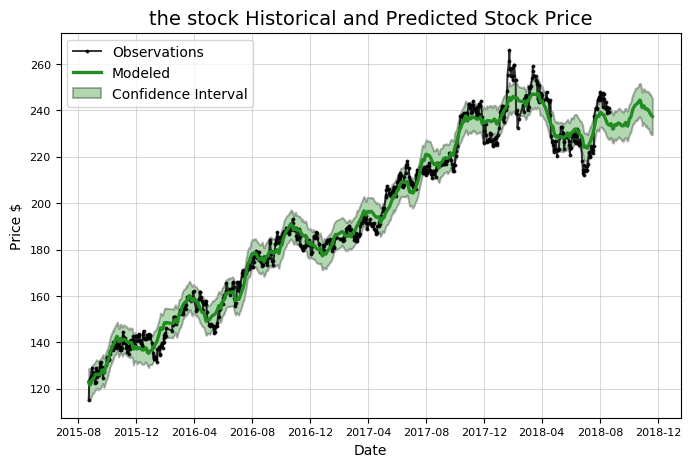

In [5]:
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2017-08-21 00:00:00 to 2018-08-21 00:00:00.

Predicted price on 2018-08-18 00:00:00 = $248.37.
Actual price on    2018-08-17 00:00:00 = $239.50.

Average Absolute Error on Training Data = $2.55.
Average Absolute Error on Testing  Data = $15.41.

When the model predicted an increase, the price increased 45.95% of the time.
When the model predicted a  decrease, the price decreased  42.27% of the time.

The actual value was within the 80% confidence interval 72.36% of the time.


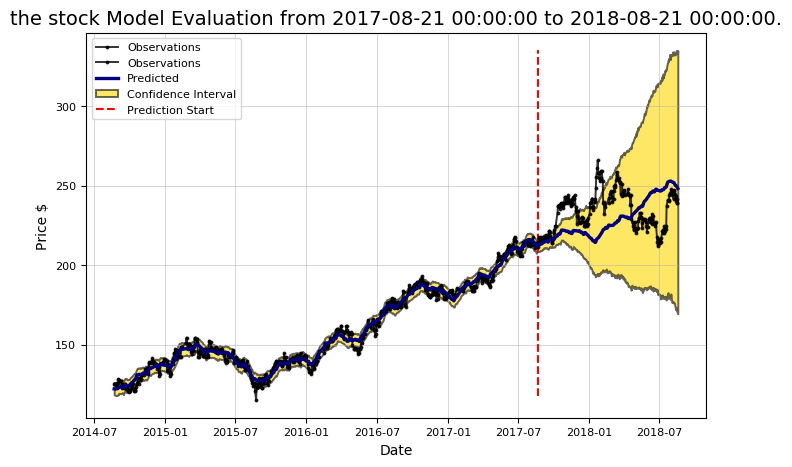

In [6]:
tsmc.evaluate_prediction()

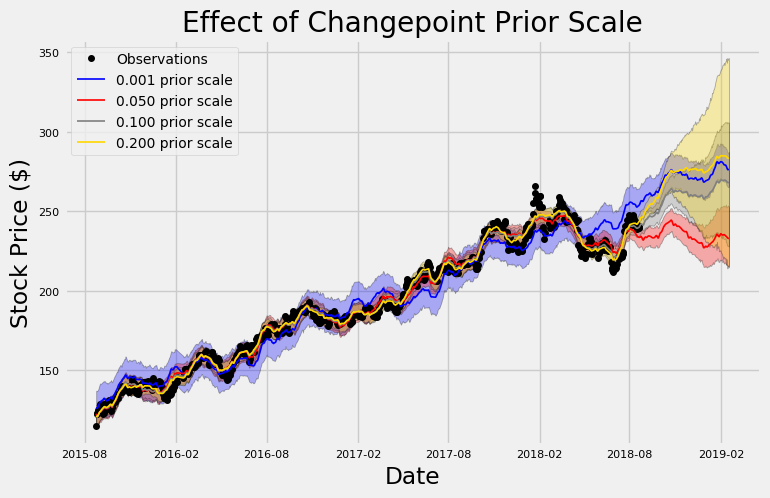

In [7]:
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Predicted Increase: 

          Date    estimate    change       upper       lower
1   2018-08-22  244.637193  0.686234  249.716251  239.733631
2   2018-08-23  245.419203  0.782010  250.559485  240.557378
3   2018-08-24  246.085432  0.666229  250.986455  241.317385
5   2018-08-26  246.428856  0.343424  251.169969  241.165584
7   2018-08-28  246.427289  0.108304  251.560487  241.666563
8   2018-08-29  246.949894  0.522605  251.612133  241.696589
9   2018-08-30  247.818390  0.868496  252.910037  242.838967
10  2018-08-31  248.773709  0.955319  253.523634  243.836423
12  2018-09-02  250.148201  1.374492  254.941387  244.913130
13  2018-09-03  250.606249  0.458048  255.499315  245.645827
14  2018-09-04  251.085048  0.478798  255.892658  245.681208
15  2018-09-05  251.628185  0.543137  256.458188  246.339666
16  2018-09-06  252.177281  0.549097  257.841891  247.049532
17  2018-09-07  252.666211  0.488930  258.118014  247.928347
19  2018-09-09  253.538394  0.872183  259.006050  247.852779
2

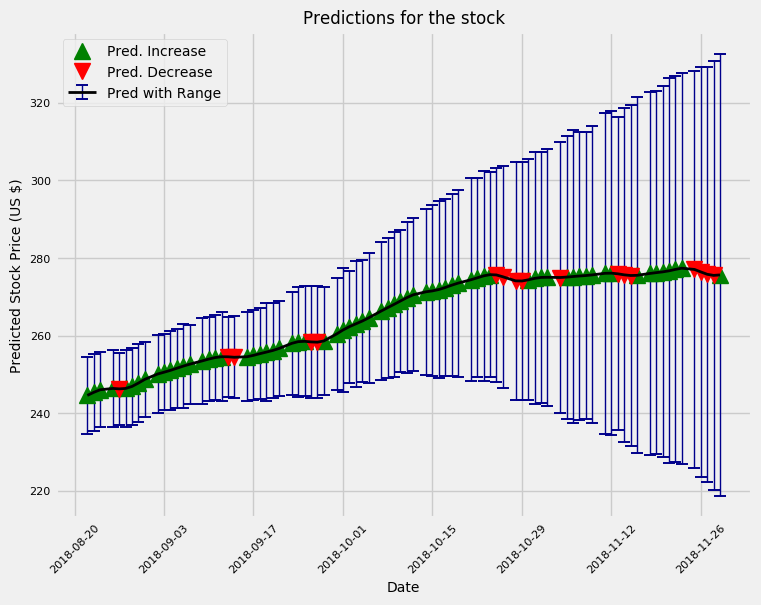

In [9]:
tsmc.predict_future(days=100)